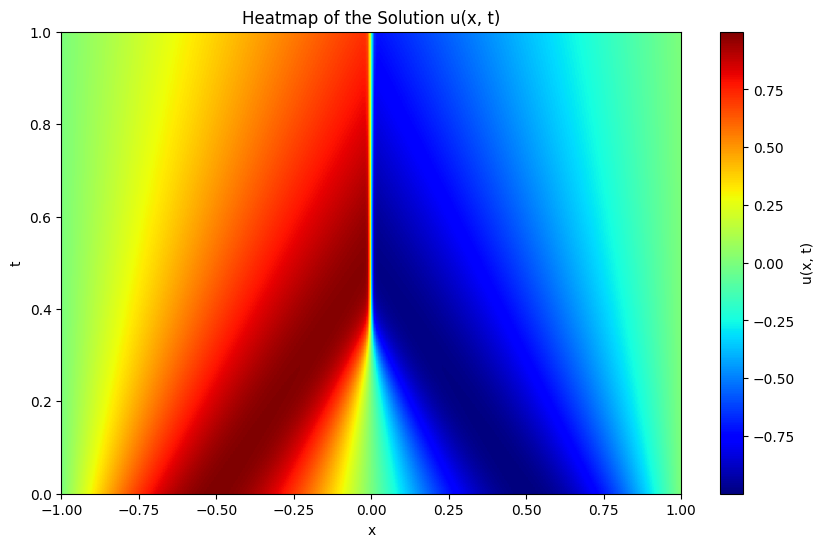

Data saved to burgers_nu_0.01.npz


In [9]:
import numpy as np
from numpy.polynomial.hermite import hermgauss
import matplotlib.pyplot as plt

nu = 0.009 / np.pi  # viscosity parameter

# Define grid for quadrature solution
utn = 128
uxn = 256
xlo = -1.0
xhi = +1.0
ux = np.linspace(xlo, xhi, uxn)
tlo = 0.0
# thi = 5.0 / np.pi
thi = 1.0
ut = np.linspace(tlo, thi, utn)

qn = 64  # order of quadrature rule
qx, qw = hermgauss(qn)

# Compute solution u(x,t) by quadrature of analytical formula:
u_quad = np.zeros([uxn, utn])
for utj in range(utn):
    if ut[utj] == 0.0:
        for uxj in range(uxn):
            u_quad[uxj, utj] = -np.sin(np.pi * ux[uxj])
    else:
        for uxj in range(uxn):
            top = 0.0
            bot = 0.0
            for qj in range(qn):
                c = 2.0 * np.sqrt(nu * ut[utj])
                top = top - qw[qj] * c * np.sin(np.pi * (ux[uxj] - c * qx[qj])) * np.exp(-np.cos(np.pi * (ux[uxj] - c * qx[qj])) / (2.0 * np.pi * nu))
                bot = bot + qw[qj] * c * np.exp(-np.cos(np.pi * (ux[uxj] - c * qx[qj])) / (2.0 * np.pi * nu))
            u_quad[uxj, utj] = top / bot



# Create a heatmap of the solution
plt.figure(figsize=(10, 6))
plt.imshow(u_quad.T, extent=[xlo, xhi, tlo, thi], aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='u(x, t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Heatmap of the Solution u(x, t)')
plt.show()



# Save x, t, u_quad in .npz file with nu parameter in the filename
filename = f'burgers_nu_{nu * np.pi:.2f}.npz'  # Format nu to 6 decimal places
np.savez("./burgers-solns/" + filename, x=ux, t=ut, usol=u_quad)
print(f"Data saved to {filename}")



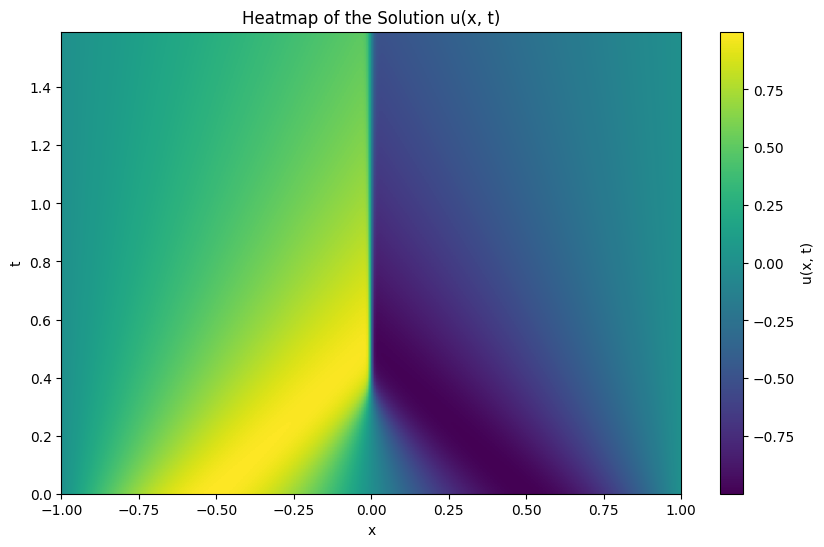

In [4]:
import numpy as np
from numpy.polynomial.hermite import hermgauss
import matplotlib.pyplot as plt  # Import matplotlib for visualization

nu = 0.01 / np.pi  # viscosity parameter

# Define grid for quadrature solution
utn = 128
uxn = 256
xlo = -1.0
xhi = +1.0
ux = np.linspace(xlo, xhi, uxn)
tlo = 0.0
thi = 5.0 / np.pi
ut = np.linspace(tlo, thi, utn)

qn = 64  # order of quadrature rule
qx, qw = hermgauss(qn)

# Compute solution u(x,t) by quadrature of analytical formula:
u_quad = np.zeros([uxn, utn])
for utj in range(utn):
    if ut[utj] == 0.0:
        for uxj in range(uxn):
            u_quad[uxj, utj] = -np.sin(np.pi * ux[uxj])
    else:
        for uxj in range(uxn):
            top = 0.0
            bot = 0.0
            for qj in range(qn):
                c = 2.0 * np.sqrt(nu * ut[utj])
                top = top - qw[qj] * c * np.sin(np.pi * (ux[uxj] - c * qx[qj])) * np.exp(-np.cos(np.pi * (ux[uxj] - c * qx[qj])) / (2.0 * np.pi * nu))
                bot = bot + qw[qj] * c * np.exp(-np.cos(np.pi * (ux[uxj] - c * qx[qj])) / (2.0 * np.pi * nu))
            u_quad[uxj, utj] = top / bot

# Create a heatmap of the solution
plt.figure(figsize=(10, 6))
plt.imshow(u_quad.T, extent=[xlo, xhi, tlo, thi], aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='u(x, t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Heatmap of the Solution u(x, t)')
plt.show()

Data saved to burgers_nu_0.0007.npz


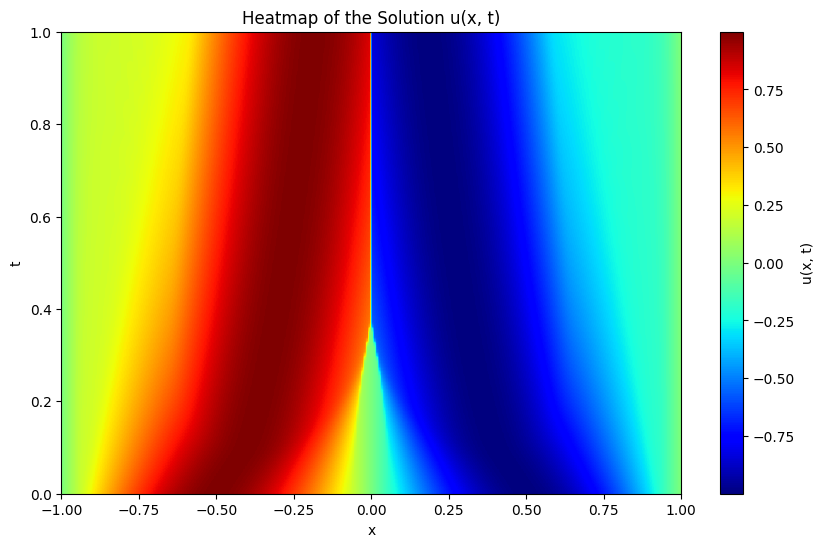

In [70]:
import numpy as np
from numpy.polynomial.hermite import hermgauss

nu = 0.0007 / np.pi  # viscosity parameter

# Define grid for quadrature solution
utn = 128
uxn = 256
xlo = -1.0
xhi = +1.0
ux = np.linspace(xlo, xhi, uxn)
tlo = 0.0
thi = 1.0
ut = np.linspace(tlo, thi, utn)

qn = 64  # order of quadrature rule
qx, qw = hermgauss(qn)

# Compute solution u(x,t) by quadrature of analytical formula:
u_quad = np.zeros([uxn, utn])
for utj in range(utn):
    if ut[utj] == 0.0:
        for uxj in range(uxn):
            u_quad[uxj, utj] = -np.sin(np.pi * ux[uxj])
    else:
        for uxj in range(uxn):
            top = 0.0
            bot = 0.0
            for qj in range(qn):
                c = 2.0 * np.sqrt(nu * ut[utj])
                exp_arg = -np.cos(np.pi * (ux[uxj] - c * qx[qj])) / (2.0 * np.pi * nu)
                exp_arg = np.clip(exp_arg, -700, 700)  # Clip to avoid overflow
                top = top - qw[qj] * c * np.sin(np.pi * (ux[uxj] - c * qx[qj])) * np.exp(exp_arg)
                bot = bot + qw[qj] * c * np.exp(exp_arg)
            u_quad[uxj, utj] = top / bot


# Save x, t, u_quad in .npz file with nu parameter in the filename
filename = f'burgers_nu_{nu * np.pi:.4f}.npz'  # Format nu to 6 decimal places
np.savez("./burgers-solns/" + filename, x=ux, t=ut, usol=u_quad)
print(f"Data saved to {filename}")


# Create a heatmap of the solution
plt.figure(figsize=(10, 6))
plt.imshow(u_quad.T, extent=[xlo, xhi, tlo, thi], aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='u(x, t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Heatmap of the Solution u(x, t)')
plt.show()